# HW2 (Emanuele)

# Ex1

In [2]:
#importing used libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df_matches_PL = pd.read_json('matches_England.json',encoding='utf-8')
df_teams = pd.read_json('teams.json',encoding='utf-8')
df_matches_PL.head(5)

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,1659,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,1628,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,1609,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,1612,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,1611,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364


In [14]:
#now what we want is to add to this dataframe, for each game who played at home, away, who won and the final score
#all this information are useful to solve this question and some others in future:

Home = []       #this woul be the new 4 columns
Away = []
HomeScore = []
AwayScore = []

for index,row in df_matches_PL.iterrows():     #now weant to split this, and replace ',' and whith '-'
    s = row['label'].replace(',', '-')
    l = s.strip().split('-')
    #print(l)
    Home.append(l[0].strip())
    Away.append(l[1].strip())
    HomeScore.append(l[2].strip())
    AwayScore.append(l[3].strip())

print(len(Home))

#now doing the set of all team in home_teams we'll have alll the 20 PL teams:
PL_Teams=list(set(Home))
#print(PLTeams)

#now i have to add this new columns to the DF:

df_matches_PL['home_team']=Home
df_matches_PL['away_team']=Away
df_matches_PL['home_score']=HomeScore
df_matches_PL['away_score']=AwayScore

print(PL_Teams)


380
['Everton', 'Crystal Palace', 'Manchester City', 'Newcastle United', 'AFC Bournemouth', 'Arsenal', 'Stoke City', 'Liverpool', 'Leicester City', 'West Bromwich Albion', 'Tottenham Hotspur', 'Huddersfield Town', 'Brighton & Hove Albion', 'Chelsea', 'Swansea City', 'Watford', 'Manchester United', 'West Ham United', 'Southampton', 'Burnley']


In [15]:
#need to do a list of winner, losers:

winnersL = []
losersL = []

for index,row in df_matches_PL.iterrows():
    if row['home_score']>row['away_score']:  #if home team has a score highter has won
        winnersL.append(row['home_team'])
        losersL.append(row['away_team'])
    elif row['home_score']<row['away_score']: #the same but for away team
        winnersL.append(row['away_team'])
        losersL.append(row['home_team'])
    elif row['home_score']==row['away_score']: #same score, it's a draw!
        winnersL.append('Draw')
        losersL.append('Draw')

#print(winnersL)
#print(losersL)

In [16]:
df_matches_PL['winner']=winnersL
df_matches_PL['loser']=losersL
   
df_matches_PL.head(5)

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId,home_team,away_team,home_score,away_score,loser
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,AFC Bournemouth,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364,Burnley,AFC Bournemouth,1,2,Burnley
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,Crystal Palace,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364,Crystal Palace,West Bromwich Albion,2,0,West Bromwich Albion
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,Arsenal,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364,Huddersfield Town,Arsenal,0,1,Huddersfield Town
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,Liverpool,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364,Liverpool,Brighton & Hove Albion,4,0,Brighton & Hove Albion
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,Manchester United,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364,Manchester United,Watford,1,0,Watford


In [17]:
#now for each team and game we determinate the points earned during the season:

lst=[]        #list team point
#Results=[]
Stats = []

for i in PL_Teams:
    #print(i)
    points=0
    victory=[]
    
    countW = 0
    MaxcountW = 0
    
    countL = 0
    MaxcountL = 0
    for index,row in df_matches_PL.iterrows():
        #print(row['Winners'])
        if row['winner']==i:
            points+=3
            victory.append(3)
        elif (row['home_team']==i or row['away_team']==i) and row['winner']=='Draw': 
            points+=1
            victory.append(1)
        elif row['loser']==i:     #draw is on both columns, is ok to check if is on one of them
            points+=0
            victory.append(0)
        
    
    for el in victory:             #i take count now of the winning and losing series: WINNING
        if el==3:
            countW += 1
        else:
            MaxcountW = max(MaxcountW, countW)
            countW = 0

    for el in victory:
        if el == 0:
            countL += 1
        else:
            MaxcountL = max(MaxcountL, countL)
            countL = 0
    
    Stats.append([i,MaxcountW,MaxcountL])  #team's name, longest wining serie, longest losing serie

    lst.append([i,points])


#print()
#print(listTeamPoints)
#print('\n')
print(Stats)

[['Everton', 2, 3], ['Crystal Palace', 3, 4], ['Manchester City', 18, 1], ['Newcastle United', 4, 4], ['AFC Bournemouth', 2, 3], ['Arsenal', 3, 3], ['Stoke City', 1, 4], ['Liverpool', 4, 1], ['Leicester City', 4, 2], ['West Bromwich Albion', 2, 8], ['Tottenham Hotspur', 6, 1], ['Huddersfield Town', 2, 5], ['Brighton & Hove Albion', 2, 3], ['Chelsea', 4, 2], ['Swansea City', 2, 5], ['Watford', 2, 4], ['Manchester United', 5, 1], ['West Ham United', 1, 3], ['Southampton', 1, 4], ['Burnley', 5, 3]]


# Now we have:

#lst:               nestes list with: [team and its points]

#Stats:             nested list with: [name team, longest wining serie, longest losing serie]



In [18]:
#we have to find out the best and worst two teams in PL
#to do this, and also tp have a nice representation of all the stats for each team, we create a new dataset:
#I need the 2 best and worst teams from stats

dfS=pd.DataFrame(Stats)                                     #from nested list to dataframe
dfS.columns=['Team','LongestWinSerie','LongestLosingSerie']
dfWinning = dfS.sort_values('LongestWinSerie',ascending=False)
dfLosing = dfS.sort_values('LongestLosingSerie',ascending=False)

print(dfWinning)
print('\n')
print(dfLosing)
print('\n')
listW = dfWinning['Team'][0:2].values.tolist()
listL = dfLosing['Team'][0:2].values.tolist()

print(listW,listL)                                       #now we have the best 2 and the worst 2

                      Team  LongestWinSerie  LongestLosingSerie
2          Manchester City               18                   1
10       Tottenham Hotspur                6                   1
16       Manchester United                5                   1
19                 Burnley                5                   3
7                Liverpool                4                   1
8           Leicester City                4                   2
13                 Chelsea                4                   2
3         Newcastle United                4                   4
5                  Arsenal                3                   3
1           Crystal Palace                3                   4
4          AFC Bournemouth                2                   3
9     West Bromwich Albion                2                   8
11       Huddersfield Town                2                   5
12  Brighton & Hove Albion                2                   3
14            Swansea City              

Text(0, 0.5, 'POINTS')

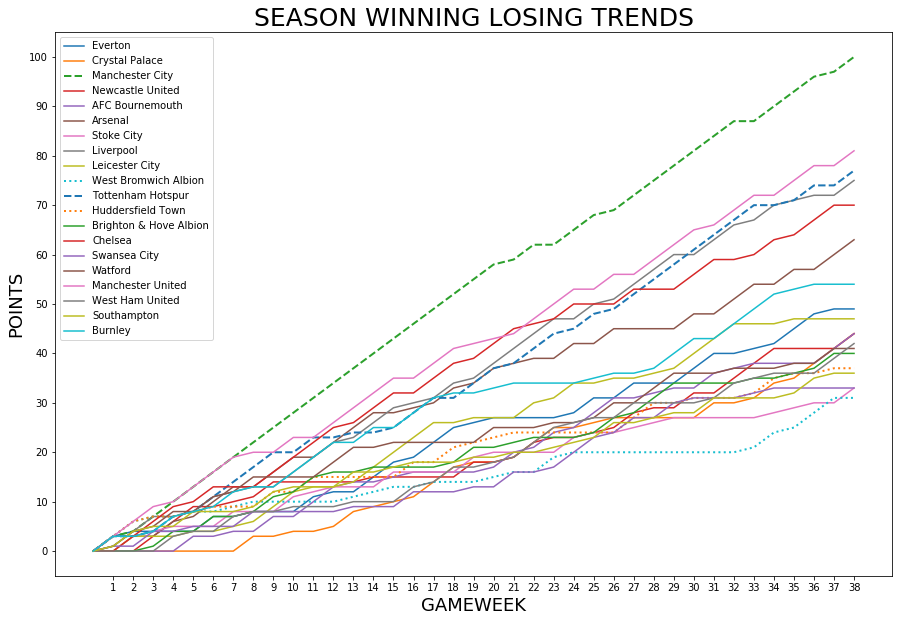

In [19]:
#now i need a sum incremental of the point of each week for team:
import numpy as np
import matplotlib.pyplot as plt

for team in PL_Teams:
    points = [0]            #we add a 0 at the beginning of the list to improve visualization 
    dftest = df_matches_PL.loc[(df_matches_PL['home_team'] == team) | (df_matches_PL['away_team'] == team)].sort_values(by='gameweek')
    for index,row in dftest.iterrows():
        if (row['winner'] == team):
            points.append(3)
        elif (row['loser'] == team):  
            points.append(0)      
        else:
            points.append(1)
    
    
    running_points = list(np.cumsum(points)) #we compute a running sum of each team's points to have their points after each gameweek
    
    fig = plt.figure(1, figsize=(15, 10))
    
    if team in listW: #we plot differently the 2 teams with longest winning streaks
        plt.plot(running_points, label = team,linestyle='dashed',linewidth=2)
    elif team in listL: #we plot differently the 2 teams with longest losing streaks
        plt.plot(running_points, label = team,linestyle='dotted',linewidth=2)
    else: #if no particular streak, we plot normally
        plt.plot(running_points, label = team,linestyle='solid')   

    
plt.legend()
plt.title('SEASON WINNING LOSING TRENDS',size=25)
plt.xticks(np.arange(1,39))
plt.yticks(np.arange(0,105,step=10))
plt.xlabel('GAMEWEEK',size=18)
plt.ylabel('POINTS',size=18)

# Ex 2

H0: playing in home field is not an advantage

H1: playng in home field is an advantage

In [20]:
import random          

temp = PL_Teams.copy()
teams_list_5 = []
for i in range(5):
    teams_list_5.append(temp.pop(random.randint(0,len(temp)-1)))
print(teams_list_5)

#so, to do a good stat we decided that the best way is picking 5 random teams

['West Ham United', 'Crystal Palace', 'AFC Bournemouth', 'Liverpool', 'West Bromwich Albion']


In [21]:
homeWin = []        #list of how many games won each team in home field
homeLose = []       #list of how many games lost each team in home field
homeDraw = []       #list of home draws for each team in home field

awayWin = []
awayLose = []
awayDraw = []

for team in teams_list_5:  #for each of the five teams
    homeWin1 = [0]
    homeLose1 = [0]
    homeDraw1 = [0]
    
    awayWin1 = [0]
    awayLose1 = [0]
    awayDraw1 = [0]
    
    for index,row in df_matches_PL.iterrows():
        
        if row['home_team']== team:
            if row['winner']== team:
                homeWin1.append(1)    #for each time we add 1 everytime they won at home
            if row['loser']== team:
                homeLose1.append(1)
            if row['winner']=='Draw':
                homeDraw1.append(1)
        
        if row['away_team']== team:
            if row['winner']== team:
                awayWin1.append(1)
            if row['loser']== team:
                awayLose1.append(1)
            if row['winner']=='Draw':
                awayDraw1.append(1)   
        
        
    homeWin.append(sum(homeWin1))    #we append to the list the sum of home victories
    homeLose.append(sum(homeLose1))
    homeDraw.append(sum(homeDraw1))
    
    awayWin.append(sum(awayWin1))
    awayLose.append(sum(awayLose1))
    awayDraw.append(sum(awayDraw1))

In [22]:
print(homeWin,homeLose,homeDraw)
print(awayWin,awayLose,awayDraw)

[7, 7, 7, 12, 3] [6, 7, 7, 0, 7] [6, 5, 5, 7, 9]
[3, 4, 4, 9, 3] [10, 9, 9, 5, 12] [6, 6, 6, 5, 4]


In [23]:
#now for each team we need to do the chisquared test:

from scipy import stats
#import stats
import numpy as np

results = {}

for i in range(len(teams_list_5)):
    l=[ [homeWin[i],homeLose[i],homeDraw[i]] , [awayWin[i],awayLose[i],awayDraw[i]] ]
    table = np.array(l)
    #print(table)
    #results.append(chisquare(table)[0:3])
    #print(stats.chi2_contingency(table)[0:3])
    results[teams_list_5[i]] = stats.chi2_contingency(table)[0:3]
    print(table)

[[ 7  6  6]
 [ 3 10  6]]
[[7 7 5]
 [4 9 6]]
[[7 7 5]
 [4 9 6]]
[[12  0  7]
 [ 9  5  5]]
[[ 3  7  9]
 [ 3 12  4]]


In [24]:
resultsDF = pd.DataFrame(results) #second line in the p-value
resultsDF = resultsDF.rename(index={1: 'p-value'})
resultsDF


,West Ham United,Crystal Palace,AFC Bournemouth,Liverpool,West Bromwich Albion
0,2.600000,1.159091,1.159091,5.761905,3.238866
p-value,0.272532,0.560153,0.560153,0.056081,0.198011
2,2.000000,2.000000,2.000000,2.000000,2.000000


beacause everytime this tabel will be different, this is  a legend of how the p-value supports or reject H0:

p-value > 0,1 NOT SIGNIFICANT

p-value <= 0,1 marginal significant

p-value <= 0,05 significant

p-value <= 0,01 higtly significant

The only team that have HIGLY SIGNIFICANT p_value is Arsenal, and we consder it the only team that strongly reject the null ipotesis. 



# Ex 3

In [25]:
teamsData = pd.DataFrame.from_dict({(i,j): df_matches_PL['teamsData'][i][j] 
                           for i in df_matches_PL['teamsData'].keys() 
                           for j in df_matches_PL['teamsData'][i].keys()},
                       orient='index')
teamsData

#so from teamsData column in df_matches_PL we extract the nested dict, and we use it to create a ne DataFrame
#As you can see there is a column of all CoachesID for each game played

scoreET  coachId  side  teamId  score  scoreP  hasFormation  \
0   1646        0     8880  home    1646      1       0             1   
    1659        0     8934  away    1659      2       0             1   
1   1628        0     8357  home    1628      2       0             1   
    1627        0        0  away    1627      0       0             1   
2   1609        0     7845  away    1609      1       0             1   
...           ...      ...   ...     ...    ...     ...           ...   
377 1627        0   149026  home    1627      1       0             1   
378 1644        0    71037  home    1644      3       0             1   
    1612        0    14791  away    1612      3       0             1   
379 1609        0     7845  home    1609      4       0             1   
    1631        0   333782  away    1631      3       0             1   

                                                  formation  scoreHT  
0   1646  {'bench': [{'playerId': 77502, 'ownGoals': '0'...        1  
    1659  {'bench': [{'playerId': 11061, 'ownGoals': '0'...        0  
1   1628  {'bench': [{'playerId': 8501, 'ownGoals': '0',...        0  
    1627  {'bench': [{'playerId': 399517, 'ownGoals': '0...        0  
2   1609  {'bench': [{'playerId': 7856, 'ownGoals': '0',...        1  
...                                                     ...      ...  
377 1627  {'bench': [{'playerId': 399517, 'ownGoals': '0...        1  
378 1644  {'bench': [{'playerId': 25798, 'ownGoals': '0'...        2  
    1612  {'bench': [{'playerId': 74, 'ownGoals': '0', '...        1  
379 1609  {'bench': [{'playerId': 20612, 'ownGoals': '0'...        2  
    1631  {'bench': [{'playerId': 119630, 'ownGoals': '0...        2  

[760 rows x 9 columns]

In [26]:
d={}                                   #key: coachId, value: teamId
for index,row in teamsData.iterrows():
    d[row['coachId']]=row['teamId']
print(d)

{8880: 1646, 8934: 1659, 8357: 1628, 0: 1610, 7845: 1609, 18572: 1673, 8093: 1651, 14791: 1612, 93112: 1644, 3295: 1611, 210700: 1613, 272869: 1610, 267136: 1625, 9054: 1639, 32573: 10531, 8329: 1639, 209010: 1631, 3782: 1624, 8541: 1623, 8235: 1633, 292863: 1624, 20454: 1610, 7973: 1627, 254174: 1619, 71037: 1644, 381291: 10531, 434992: 1623, 9454: 1627, 149026: 1627, 269869: 1633, 268779: 1623, 8214: 1631, 333782: 1631, 531745: 1613, 268775: 1628}


In [27]:
CoachesList1 = []

for index,row in teamsData.iterrows():
     CoachesList1.append(row['coachId']) #we add to a list all Ids in our new DataFrame

CoachesList1=set(CoachesList1)  #every coach in PL, without repetitions

In [28]:
df_coaches = pd.read_json('coaches.json') #DF with all coaches in several leagues
df_coaches.head(7)

,wyId,shortName,firstName,middleName,lastName,birthDate,birthArea,passportArea,currentTeamId
0,275580,Cesar Domingo,César Domingo,,Mendiondo López,None,"{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...","{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...",0
1,14710,J. Heynckes,Josef,,Heynckes,1945-05-09,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...","{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",0
2,135480,G. De Biasi,Giovanni,,De Biasi,1956-06-16,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...","{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",0
3,210074,Marcelino,Marcelino,,García Toral,1965-08-14,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",674
4,293398,T. Korkut,Tayfun,,Korkut,1974-04-02,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...","{'id': 792, 'alpha2code': 'TR', 'alpha3code': ...",0
5,92894,Ernesto Valverde,Ernesto,,Valverde Tejedor,1964-02-09,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",676
6,3880,Unzué,Juan Carlos,,Unzué Labiano,1967-04-22,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",0


In [29]:
l= []
for coach in CoachesList1:                # we search PL coaches in the previous DataFrame
    for index,row in df_coaches.iterrows():
        if row['wyId']==coach:
            l.append(row.tolist())        #in this way we append every row with positive result as a list in l, having a nestet list

PL_Coaches2 =pd.DataFrame(l)    #from a nestes list to a new DataFrame
PL_Coaches2.columns = ['wyId','shortName','firstName','middleName','lastName','birthDate','birthArea','passportArea','currentTeamId']
PL_Coaches2.head(5)

,wyId,shortName,firstName,middleName,lastName,birthDate,birthArea,passportArea,currentTeamId
0,267136,Guardiola,Josep,,Guardiola i Sala,1971-01-18,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",1625
1,8329,P. Lambert,Paul,,Lambert,1969-08-07,"{'id': 1002, 'alpha2code': 'SC', 'alpha3code':...","{'id': 1002, 'alpha2code': 'SC', 'alpha3code':...",1634
2,18572,D. Wagner,David,,Wagner,1971-10-19,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...","{'id': 840, 'alpha2code': 'US', 'alpha3code': ...",0
3,210700,Rafael Benítez,Rafael,,Benítez Maudes,1960-04-16,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",1613
4,8214,M. Appleton,Michael,,Appleton,1975-12-04,"{'id': 826, 'alpha2code': 'EN', 'alpha3code': ...","{'id': 826, 'alpha2code': 'EN', 'alpha3code': ...",8514


In [30]:
lcoachesID = []
wyIdList = PL_Coaches2['wyId'].tolist()

for coach in CoachesList1:
    if coach in d:                      #d is the dict with coachId as a key and teamId as a value
        lcoachesID.append(d[coach])     

#we have to do this otherwise in next step lenght of CoachesList1 isn't the same of our DataFrame

lcoachesID1=[]

for key in d:
    for index,row in PL_Coaches2.iterrows():
        if row['wyId']==key:
            lcoachesID1.append(d[key])
len(lcoachesID1)                        #now is the same
print(lcoachesID1)
PL_Coaches2['TeamId'] = lcoachesID1

[1646, 1659, 1628, 1609, 1673, 1651, 1612, 1644, 1611, 1613, 1610, 1625, 1639, 10531, 1639, 1631, 1623, 1633, 1624, 1610, 1627, 1619, 1644, 10531, 1623, 1627, 1627, 1633, 1623, 1631, 1631, 1613, 1628]


In [31]:
from datetime import date  #from Nathan

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

age_list = []
date_list = []

for index,row in PL_Coaches2.iterrows():
    date_format = row['birthDate'].split('-')
    age_list.append(calculate_age(date(int(date_format[0]),int(date_format[1]),int(date_format[2]))))

PL_Coaches2['Age'] = age_list
PL_Coaches2.head(5)

,wyId,shortName,firstName,middleName,lastName,birthDate,birthArea,passportArea,currentTeamId,TeamId,Age
0,267136,Guardiola,Josep,,Guardiola i Sala,1971-01-18,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",1625,1646,48
1,8329,P. Lambert,Paul,,Lambert,1969-08-07,"{'id': 1002, 'alpha2code': 'SC', 'alpha3code':...","{'id': 1002, 'alpha2code': 'SC', 'alpha3code':...",1634,1659,50
2,18572,D. Wagner,David,,Wagner,1971-10-19,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...","{'id': 840, 'alpha2code': 'US', 'alpha3code': ...",0,1628,48
3,210700,Rafael Benítez,Rafael,,Benítez Maudes,1960-04-16,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",1613,1609,59
4,8214,M. Appleton,Michael,,Appleton,1975-12-04,"{'id': 826, 'alpha2code': 'EN', 'alpha3code': ...","{'id': 826, 'alpha2code': 'EN', 'alpha3code': ...",8514,1673,43


In [32]:
PL_ids_list = []    #list of all PL teams ids 

for team in PL_Teams:
    for index,row in df_teams.iterrows():  

        if row['name']==team:
            PL_ids_list.append (row['wyId']) 
        else:
            continue
print(PL_ids_list)

[1623, 1628, 1625, 1613, 1659, 1609, 1639, 1612, 1631, 1627, 1624, 1673, 1651, 1610, 10531, 1644, 1611, 1633, 1619, 1646]


In [33]:
#need a dataframe of all Pl Teams,:
l = []
for ids in PL_ids_list:
    for index,row in df_teams.iterrows():
        if row['wyId']==ids:
            l.append(row.tolist())

PL_Teams2 =pd.DataFrame(l)    
PL_Teams2.columns = ['city','name','wyId','officialName','area','type']
PL_Teams2.head(5)

,city,name,wyId,officialName,area,type
0,Liverpool,Everton,1623,Everton FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,London,Crystal Palace,1628,Crystal Palace FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
2,Manchester,Manchester City,1625,Manchester City FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
3,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
4,"Bournemouth, Dorset",AFC Bournemouth,1659,AFC Bournemouth,"{'name': 'England', 'id': '0', 'alpha3code': '...",club


In [34]:
#now we merge the two DF
PL_CoachesTeams = pd.merge(PL_Teams2, PL_Coaches2, left_on='wyId', right_on='TeamId')
PL_CoachesTeams

#and we reduce the columns:

CoachesDF = PL_CoachesTeams[['officialName','shortName','firstName','birthDate','Age']].copy()
CoachesDF.columns = ['Team','shortName','firstName','birthDate','Age']
CoachesDF

,Team,shortName,firstName,birthDate,Age
0,Everton FC,Carlos Carvalhal,Carlos Augusto,1965-12-04,53
1,Everton FC,E. Howe,Eddie,1977-11-29,41
2,Everton FC,R. Koeman,Ronald,1963-03-21,56
3,Crystal Palace FC,D. Wagner,David,1971-10-19,48
4,Crystal Palace FC,M. Pochettino,Mauricio Roberto,1972-03-02,47
5,Manchester City FC,D. Moyes,David,1963-04-25,56
6,Newcastle United FC,A. Wenger,Arsène,1949-10-22,70
7,Newcastle United FC,Marco Silva,Marco Alexandre,1977-07-12,42
8,AFC Bournemouth,P. Lambert,Paul,1969-08-07,50
9,Arsenal FC,Rafael Benítez,Rafael,1960-04-16,59


In [35]:
#now what we need is to sort them by their age:
Youngest = CoachesDF.sort_values(by=['birthDate'],ascending=False).reset_index(drop=True)
Youngest = Youngest[0:10]
Youngest

,Team,shortName,firstName,birthDate,Age
0,Everton FC,E. Howe,Eddie,1977-11-29,41
1,Newcastle United FC,Marco Silva,Marco Alexandre,1977-07-12,42
2,Huddersfield Town FC,M. Appleton,Michael,1975-12-04,43
3,Stoke City FC,D. Unsworth,David,1973-10-16,46
4,Liverpool FC,Paco,Francisco,1973-02-19,46
5,Crystal Palace FC,M. Pochettino,Mauricio Roberto,1972-03-02,47
6,West Ham United FC,P. Clement,Paul,1972-01-08,47
7,Crystal Palace FC,D. Wagner,David,1971-10-19,48
8,Watford FC,M. Pellegrino,Mauricio,1971-10-05,48
9,Swansea City AFC,S. Dyche,Sean,1971-06-28,48


THIS ARE THE FIRST 10 TEAMS RANKED BY THE YOUNGEST COACH

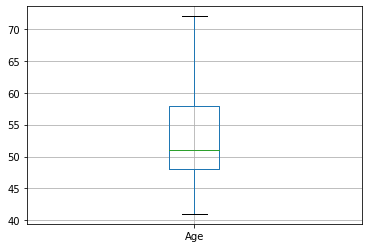

In [36]:
CoachesDF.boxplot(column=['Age']) #ALL AGES, not the first ten

# Ex 4

In [37]:
df_players = pd.read_json('players.json',encoding='utf-8')
df_players.head(3)

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null


In [38]:
#We create a new dataframe with only premier league players:

df_players_PL = df_players.loc[df_players['currentTeamId'].isin(PL_ids_list)]
df_players_PL.reset_index(drop=True) #reset all indexes

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",91,Toby,,Alderweireld,1624,1989-03-02,187,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Belgium', 'id': '56', 'alpha3code': ...",36,right,T. Alderweireld,5629
1,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",88,Jan,,Vertonghen,1624,1987-04-24,189,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Belgium', 'id': '56', 'alpha3code': ...",48,left,J. Vertonghen,5629
2,"{'name': 'Denmark', 'id': '208', 'alpha3code':...",76,Christian,,Dannemann Eriksen,1624,1992-02-14,180,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Denmark', 'id': '208', 'alpha3code':...",54,right,C. Eriksen,7712
3,"{'name': 'Iceland', 'id': '352', 'alpha3code':...",77,Johann,,Berg Gu\u00f0munds\u00adson,1646,1990-10-27,186,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Iceland', 'id': '352', 'alpha3code':...",93,left,J. Gu\u00f0munds\u00adson,7839
4,"{'name': 'Morocco', 'id': '504', 'alpha3code':...",80,Nacer,,Chadli,1627,1989-08-02,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Belgium', 'id': '56', 'alpha3code': ...",261,right,N. Chadli,5629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,"{'name': 'Spain', 'id': 724, 'alpha3code': 'ES...",69,Juan Marcos,,Foyth,1624,1998-01-12,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Argentina', 'id': 32, 'alpha3code': ...",456053,right,J. Foyth,12274
438,"{'name': 'Congo DR', 'id': 180, 'alpha3code': ...",72,Aaron,,Wan-Bissaka,1628,1997-11-26,183,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",486252,right,A. Wan-Bissaka,2421
439,"{'name': 'Wales', 'id': 0, 'alpha3code': 'XWA'...",60,Jonathan,,Williams,1628,1993-10-09,168,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",8421,right,J. Williams,null
440,"{'name': 'Ecuador', 'id': 218, 'alpha3code': '...",64,Jefferson Antonio,,Montero Vite,10531,1989-09-01,169,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Ecuador', 'id': 218, 'alpha3code': '...",3599,right,J. Montero,null


In [39]:
#now we need to identify the id for each player
PlayersID = df_players_PL['wyId'].tolist()

#passes are in EVENT: 8 and all types are from 80 to to 86 (Cross,hans,head,high,launch,simple,smart)

PassesDict = {8:[80,81,82,83,84,85,86]}

In [41]:
#now we need to create a new DataFrame with all passes in events, to do this we need :

df_events_PL = pd.read_json('events_England.json')


In [42]:
df_events_PL

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175
...,...,...,...,...,...,...,...,...,...,...,...,...
643145,5,Ball out of the field,[],0,"[{'y': 32, 'x': 0}, {'y': 100, 'x': 100}]",2500098,Interruption,1623,2H,2796.732525,50,251596409
643146,3,Corner,"[{'id': 302}, {'id': 801}, {'id': 1801}]",70965,"[{'y': 100, 'x': 100}, {'y': 47, 'x': 88}]",2500098,Free Kick,1633,2H,2829.821084,30,251596232
643147,1,Air duel,"[{'id': 701}, {'id': 1802}]",7919,"[{'y': 53, 'x': 12}, {'y': 50, 'x': 14}]",2500098,Duel,1623,2H,2831.211419,10,251596410
643148,1,Air duel,"[{'id': 703}, {'id': 1801}]",8005,"[{'y': 47, 'x': 88}, {'y': 50, 'x': 86}]",2500098,Duel,1633,2H,2832.434399,10,251596234


In [43]:
df_passes_PL = df_events_PL.loc[df_events_PL['eventId'].isin(PassesDict)].reset_index(drop=True)  #find 8 in all rows
df_passes_PL

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175
...,...,...,...,...,...,...,...,...,...,...,...,...
328652,8,Simple pass,[{'id': 1801}],8313,"[{'y': 63, 'x': 65}, {'y': 96, 'x': 61}]",2500098,Pass,1633,2H,2760.286946,85,251596219
328653,8,Simple pass,[{'id': 1801}],379209,"[{'y': 96, 'x': 61}, {'y': 85, 'x': 40}]",2500098,Pass,1633,2H,2763.698599,85,251596221
328654,8,Simple pass,[{'id': 1801}],8561,"[{'y': 70, 'x': 59}, {'y': 89, 'x': 53}]",2500098,Pass,1633,2H,2783.137836,85,251596225
328655,8,High pass,[{'id': 1801}],20620,"[{'y': 89, 'x': 53}, {'y': 72, 'x': 99}]",2500098,Pass,1633,2H,2785.702032,83,251596226


In [46]:
#we know that tag colums is a list of dictionaries, so what we do is to find out for two elements in that list:
#{'id':1801} for done pass, and {'id':1802} for failed pass

pass_state=[]
for index,row in df_passes_PL.iterrows():
    if {'id':1801} in row['tags']:
        pass_state.append('successful')
    elif {'id':1802} in row['tags']:
        pass_state.append('failed')
        
print(len(pass_state))   #if len is the same numeber of the columns i should have done in the right way my for cycle

328657


In [48]:
#now we add this column to the df_passes_PL dataframe:

df_passes_PL['pass_status']=pass_state

#now we need just two columns of the df_passes_PL, so we create an other one:


passes1 = df_passes_PL[['playerId', 'pass_status']].copy()
passes1

,playerId,pass_status
0,25413,successful
1,370224,successful
2,3319,successful
3,120339,successful
4,167145,successful
...,...,...
328652,8313,successful
328653,379209,successful
328654,8561,successful
328655,20620,successful


In [49]:
#we need only the PL players who did passes, or the presence of someone with 0 passes will give error in divion by 0 later

PlayingPlayers = []
playerId = passes1['playerId'].tolist()

for i in PlayersID:
    if i in playerId:
        PlayingPlayers.append(i)
print(len(PlayingPlayers)) #number of player we have to analyze

401


In [67]:
#d={}
ratiol=[]
nameId = []

for player in PlayingPlayers: #for each player
    achieved=0
    tried=0
    playerpasses= passes1.loc[passes1['playerId']==player]
    
    for index,row in playerpasses.iterrows():  #we check if his pass is done or not
        if row['pass_status']=='successful':
            achieved += 1                      #count of done
        elif row['pass_status']=='failed':
            tried += 1                         #count of tried
            
        #passes1.drop(index, inplace=True)
    
    total = achieved+tried
    if total>76:                               # All player with at least 2 passes per game
        ratio = achieved / total               #ratio of done passes over the total amount
        ratiol.append(ratio)                   #for each player we append his ratio
        nameId.append(player)                  #for each player we append his name
         
    #d[player]=[achieved,Done]

In [68]:
#now we need the name of every player in the list (for a better presentation)

names = []

for ids in nameId:
    for index, row in df_players.iterrows():
        if ids==row['wyId']:
            names.append(row['lastName'])

In [71]:
#there is a problem with encoding in players.json, sometimes instead of \ we founf \\, so we shoul replaced all

finaltab =pd.DataFrame()

finaltab['Names']=names
finaltab['Ratio']=ratiol
#finaltab.at[7,'Names']='Gündoğan'
#finaltab.at[9,'Names']='Dembélé'

finaltab1 = finaltab.sort_values(['Ratio'],ascending=False).reset_index(drop=True)
finaltab1[0:10]

,Names,Ratio
0,Stones,0.975914
1,Delph,0.945076
2,Kompany,0.943206
3,Christensen,0.940217
4,Jones,0.938505
5,Otamendi,0.937584
6,Elsayed Elneny,0.936451
7,G\u00fcndo\u011fan,0.935556
8,Nilsson Lindel\u00f6f,0.935528
9,Demb\u00e9l\u00e9,0.932601
